In [ ]:
# selenium 라이브러리를 설치합니다.
!pip install selenium
# webdriver-manager 라이브러리 설치
!pip install webdriver-manager

# 필요한 모듈들을 임포트합니다.
import pandas as pd
from IPython import get_ipython
from IPython.display import display
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
import time
from collections import Counter
import re
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service as ChromeService  # Service를 올바르게 임포트
import os
from openpyxl import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.3/486.3 kB 10.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Google Chrome 및 ChromeDriver 설치를 위한 명령어들입니다.
!apt-get update
!apt-get install -y google-chrome-stable
!whereis google-chrome
!pip install webdriver-manager

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,234 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [62.5 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu 

In [ ]:
!pip install requests beautifulsoup4 pandas matplotlib konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 17.9 MB/s eta 0:00:00


In [ ]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 124565 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
# Import matplotlib and matplotlib.pyplot
import matplotlib
import matplotlib.pyplot as plt

# Configure the font family to 'NanumGothic' and then to 'NanumBarunGothic'
plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

['NanumBarunGothic'] 11.0


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime, timedelta
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt

- 미숙아 연하곤란

In [ ]:
import urllib.request

In [ ]:
import requests
import pandas as pd
from datetime import datetime

# 네이버 API 정보
client_id = 'client id'  # 사용자 Client ID
client_secret = 'client secret'  # 사용자 Client Secret

# 네이버 지식인 크롤링 함수
def naver_kin_crawler(keyword, max_display=10, sort="date"):
    results = []
    url = "https://openapi.naver.com/v1/search/kin.json"
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret
    }

    for start in range(1, 1000, max_display):  # start는 1부터 시작하며, 최대 1000까지 가능
        params = {
            "query": keyword,
            "display": max_display,
            "start": start,
            "sort": sort
        }

        try:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()  # HTTP 에러 발생 시 예외 처리
            data = response.json()

            for item in data.get('items', []):
                results.append({
                    'title': item['title'],
                    'description': item['description'],
                    'link': item['link'],
                    #'collectedDate': datetime.now().strftime('%Y-%m-%d')  # 현재 수집 날짜 기록
                })
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            break

    return results

# 실행
if __name__ == "__main__":
    keyword = "미숙아 연하곤란"
    #start_date = datetime(2020, 1, 1)
    #end_date = datetime(2024, 12, 31)

    print(f"'{keyword}'에 대한 네이버 지식인 검색 중...")
    kin_data = naver_kin_crawler(keyword)
    print(f"총 {len(kin_data)}개의 지식인 글이 수집되었습니다.")

    # 데이터프레임으로 저장
    kin_df = pd.DataFrame(kin_data)
    kin_df.to_csv('미숙아 연하곤란_지식인.csv', index=False, encoding='utf-8-sig')
    print("데이터 저장 완료: 미숙아 연하곤란_지식인.csv")

'미숙아 연하곤란'에 대한 네이버 지식인 검색 중...
총 12개의 지식인 글이 수집되었습니다.
데이터 저장 완료: 미숙아 연하곤란_지식인.csv


- 미숙아 삼킴문제

In [ ]:
import requests
import pandas as pd
from datetime import datetime

# 네이버 API 정보
client_id = 'client id'  # 사용자 Client ID
client_secret = 'client secret'  # 사용자 Client Secret

# 네이버 지식인 크롤링 함수
def naver_kin_crawler(keyword, max_display=10, sort="date"):
    results = []
    url = "https://openapi.naver.com/v1/search/kin.json"
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret
    }

    for start in range(1, 1000, max_display):  # start는 1부터 시작하며, 최대 1000까지 가능
        params = {
            "query": keyword,
            "display": max_display,
            "start": start,
            "sort": sort
        }

        try:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()  # HTTP 에러 발생 시 예외 처리
            data = response.json()

            for item in data.get('items', []):
                results.append({
                    'title': item['title'],
                    'description': item['description'],
                    'link': item['link'],
                    #'collectedDate': datetime.now().strftime('%Y-%m-%d')  # 현재 수집 날짜 기록
                })
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            break

    return results

# 실행
if __name__ == "__main__":
    keyword = "미숙아 삼킴문제"
    #start_date = datetime(2020, 1, 1)
    #end_date = datetime(2024, 12, 31)

    print(f"'{keyword}'에 대한 네이버 지식인 검색 중...")
    kin_data = naver_kin_crawler(keyword)
    print(f"총 {len(kin_data)}개의 지식인 글이 수집되었습니다.")

    # 데이터프레임으로 저장
    kin_df = pd.DataFrame(kin_data)
    kin_df.to_csv('미숙아 삼킴문제_지식인.csv', index=False, encoding='utf-8-sig')
    print("데이터 저장 완료: 미숙아 삼킴문제_지식인.csv")

'미숙아 삼킴문제'에 대한 네이버 지식인 검색 중...
총 5개의 지식인 글이 수집되었습니다.
데이터 저장 완료: 미숙아 삼킴문제_지식인.csv


- 미숙아 모유수유 문제

In [ ]:
import requests
import pandas as pd
from datetime import datetime

# 네이버 API 정보
client_id = 'client id'  # 사용자 Client ID
client_secret = 'client secret'  # 사용자 Client Secret

# 네이버 지식인 크롤링 함수
def naver_kin_crawler(keyword, max_display=10, sort="date"):
    results = []
    url = "https://openapi.naver.com/v1/search/kin.json"
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret
    }

    for start in range(1, 1000, max_display):  # start는 1부터 시작하며, 최대 1000까지 가능
        params = {
            "query": keyword,
            "display": max_display,
            "start": start,
            "sort": sort
        }

        try:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()  # HTTP 에러 발생 시 예외 처리
            data = response.json()

            for item in data.get('items', []):
                results.append({
                    'title': item['title'],
                    'description': item['description'],
                    'link': item['link'],
                    #'collectedDate': datetime.now().strftime('%Y-%m-%d')  # 현재 수집 날짜 기록
                })
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            break

    return results

# 실행
if __name__ == "__main__":
    keyword = "미숙아 모유수유 문제"
    #start_date = datetime(2020, 1, 1)
    #end_date = datetime(2024, 12, 31)

    print(f"'{keyword}'에 대한 네이버 지식인 검색 중...")
    kin_data = naver_kin_crawler(keyword)
    print(f"총 {len(kin_data)}개의 지식인 글이 수집되었습니다.")

    # 데이터프레임으로 저장
    kin_df = pd.DataFrame(kin_data)
    kin_df.to_csv('미숙아 모유수유 문제_지식인.csv', index=False, encoding='utf-8-sig')
    print("데이터 저장 완료: 미숙아 모유수유 문제_지식인.csv")

'미숙아 모유수유 문제'에 대한 네이버 지식인 검색 중...
총 301개의 지식인 글이 수집되었습니다.
데이터 저장 완료: 미숙아 모유수유 문제_지식인.csv


- 미숙아 수유 어려움

In [ ]:
import requests
import pandas as pd
from datetime import datetime

# 네이버 API 정보
client_id = 'client id'  # 사용자 Client ID
client_secret = 'client secret'  # 사용자 Client Secret

# 네이버 지식인 크롤링 함수
def naver_kin_crawler(keyword, max_display=10, sort="date"):
    results = []
    url = "https://openapi.naver.com/v1/search/kin.json"
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret
    }

    for start in range(1, 1000, max_display):  # start는 1부터 시작하며, 최대 1000까지 가능
        params = {
            "query": keyword,
            "display": max_display,
            "start": start,
            "sort": sort
        }

        try:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()  # HTTP 에러 발생 시 예외 처리
            data = response.json()

            for item in data.get('items', []):
                results.append({
                    'title': item['title'],
                    'description': item['description'],
                    'link': item['link'],
                    #'collectedDate': datetime.now().strftime('%Y-%m-%d')  # 현재 수집 날짜 기록
                })
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            break

    return results

# 실행
if __name__ == "__main__":
    keyword = "미숙아 수유 어려움"
    #start_date = datetime(2020, 1, 1)
    #end_date = datetime(2024, 12, 31)

    print(f"'{keyword}'에 대한 네이버 지식인 검색 중...")
    kin_data = naver_kin_crawler(keyword)
    print(f"총 {len(kin_data)}개의 지식인 글이 수집되었습니다.")

    # 데이터프레임으로 저장
    kin_df = pd.DataFrame(kin_data)
    kin_df.to_csv('미숙아 수유 어려움_지식인.csv', index=False, encoding='utf-8-sig')
    print("데이터 저장 완료: 미숙아 수유 어려움_지식인.csv")

'미숙아 수유 어려움'에 대한 네이버 지식인 검색 중...
총 82개의 지식인 글이 수집되었습니다.
데이터 저장 완료: 미숙아 수유 어려움_지식인.csv


- 미숙아 빨기 문제

In [ ]:
import requests
import pandas as pd
from datetime import datetime

# 네이버 API 정보
client_id = 'client id'  # 사용자 Client ID
client_secret = 'client secret'  # 사용자 Client Secret

# 네이버 지식인 크롤링 함수
def naver_kin_crawler(keyword, max_display=10, sort="date"):
    results = []
    url = "https://openapi.naver.com/v1/search/kin.json"
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret
    }

    for start in range(1, 1000, max_display):  # start는 1부터 시작하며, 최대 1000까지 가능
        params = {
            "query": keyword,
            "display": max_display,
            "start": start,
            "sort": sort
        }

        try:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()  # HTTP 에러 발생 시 예외 처리
            data = response.json()

            for item in data.get('items', []):
                results.append({
                    'title': item['title'],
                    'description': item['description'],
                    'link': item['link'],
                    #'collectedDate': datetime.now().strftime('%Y-%m-%d')  # 현재 수집 날짜 기록
                })
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")
            break

    return results

# 실행
if __name__ == "__main__":
    keyword = "미숙아 빨기 문제"
    #start_date = datetime(2020, 1, 1)
    #end_date = datetime(2024, 12, 31)

    print(f"'{keyword}'에 대한 네이버 지식인 검색 중...")
    kin_data = naver_kin_crawler(keyword)
    print(f"총 {len(kin_data)}개의 지식인 글이 수집되었습니다.")

    # 데이터프레임으로 저장
    kin_df = pd.DataFrame(kin_data)
    kin_df.to_csv('미숙아 빨기 문제_지식인.csv', index=False, encoding='utf-8-sig')
    print("데이터 저장 완료: 미숙아 빨기 문제_지식인.csv")

'미숙아 빨기 문제'에 대한 네이버 지식인 검색 중...
총 19개의 지식인 글이 수집되었습니다.
데이터 저장 완료: 미숙아 빨기 문제_지식인.csv


# 전처리 진행

- 미숙아 연하곤란

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

# 파일 경로 설정
file_path = "/content/drive/MyDrive/지식인_크롤링(2020-2024)/미숙아 연하곤란_지식인.csv"

# CSV 파일 불러오기
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='euc-kr')

# 데이터 확인
print("데이터 샘플:")
print(data.head())

# 불필요한 열 제거
data = data.drop(columns=['불필요한열'], errors='ignore')

# 결측치 처리
data = data.dropna()

# 날짜 변환
data['pubDate'] = pd.to_datetime(data['pubDate'])

# 중복 제거
data = data.drop_duplicates(subset=['title', 'link'])

# 텍스트 전처리 (HTML 태그 제거)
data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# 전처리 결과 확인
print("전처리 후 데이터 샘플:")
print(data.head())

# 결과 저장
data.to_csv('전처리된_미숙아 연하곤란_지식인.csv', index=False, encoding='utf-8-sig')
print("전처리 완료. 파일 저장됨.")

데이터 샘플:
     title                                        description  \
0  이명 리보트릴  ... 신생아 : <b>미숙아</b>, 신생아에 대한 안전성은 확립되어 있지 않다....   

                                                link     pubDate  
0  https://kin.naver.com/qna/detail.naver?d1id=7&...  2021-01-24  
전처리 후 데이터 샘플:
     title                                        description  \
0  이명 리보트릴  ... 신생아 : 미숙아, 신생아에 대한 안전성은 확립되어 있지 않다. ② 영·유아...   

                                                link    pubDate  
0  https://kin.naver.com/qna/detail.naver?d1id=7&... 2021-01-24  
전처리 완료. 파일 저장됨.


- 미숙아 삼킴문제

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

# 파일 경로 설정
file_path = "/content/drive/MyDrive/지식인_크롤링(2020-2024)/미숙아 삼킴문제_지식인.csv"

# CSV 파일 불러오기
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='euc-kr')

# 데이터 확인
print("데이터 샘플:")
print(data.head())

# 불필요한 열 제거
data = data.drop(columns=['불필요한열'], errors='ignore')

# 결측치 처리
data = data.dropna()

# 날짜 변환
data['pubDate'] = pd.to_datetime(data['pubDate'])

# 중복 제거
data = data.drop_duplicates(subset=['title', 'link'])

# 텍스트 전처리 (HTML 태그 제거)
data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# 전처리 결과 확인
print("전처리 후 데이터 샘플:")
print(data.head())

# 결과 저장
data.to_csv('전처리된_미숙아 삼킴문제_지식인.csv', index=False, encoding='utf-8-sig')
print("전처리 완료. 파일 저장됨.")

데이터 샘플:
              title                                        description  \
0  ADHD에 관하여(내공100)  ... 제가 <b>문제</b>라고 생각하는 저의 특징} •자존감 낮음-누가 나 예쁘...   
1     신생아 콧물,청력시력검사  ... 신체적 <b>문제</b>는 없다는데 <b>삼킴</b>작용에 어려움이 있는 이...   

                                                link     pubDate  
0  https://kin.naver.com/qna/detail.naver?d1id=7&...  2024-01-20  
1  https://kin.naver.com/qna/detail.naver?d1id=3&...  2022-12-05  
전처리 후 데이터 샘플:
              title                                        description  \
0  ADHD에 관하여(내공100)  ... 제가 문제라고 생각하는 저의 특징} •자존감 낮음-누가 나 예쁘다고 하면.....   
1     신생아 콧물,청력시력검사  ... 신체적 문제는 없다는데 삼킴작용에 어려움이 있는 이유는 어떤게 있을까요? 계...   

                                                link    pubDate  
0  https://kin.naver.com/qna/detail.naver?d1id=7&... 2024-01-20  
1  https://kin.naver.com/qna/detail.naver?d1id=3&... 2022-12-05  
전처리 완료. 파일 저장됨.


- 미숙아 모유수유 문제

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

# 파일 경로 설정
file_path = "/content/drive/MyDrive/지식인_크롤링(2020-2024)/미숙아 모유수유 문제_지식인.csv"

# CSV 파일 불러오기
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='euc-kr')

# 데이터 확인
print("데이터 샘플:")
print(data.head())

# 불필요한 열 제거
data = data.drop(columns=['불필요한열'], errors='ignore')

# 결측치 처리
data = data.dropna()

# 날짜 변환
data['pubDate'] = pd.to_datetime(data['pubDate'])

# 중복 제거
data = data.drop_duplicates(subset=['title', 'link'])

# 텍스트 전처리 (HTML 태그 제거)
data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# 전처리 결과 확인
print("전처리 후 데이터 샘플:")
print(data.head())

# 결과 저장
data.to_csv('전처리된_미숙아 모유수유 문제_지식인.csv', index=False, encoding='utf-8-sig')
print("전처리 완료. 파일 저장됨.")

데이터 샘플:
                                        title  \
0                         자유<b>수유</b> 이게 맞나요?   
1                                        간 증상   
2  <b>미숙아</b> 황달 증상이 있으면 <b>모유수유</b> 중단해야하나요?   
3                아기 접종 후 감기로 항생제 처방 관련 문의드려요~   
4                      4~5개월 아기 <b>수유</b>량 관련   

                                         description  \
0  ... 저희 아이는 32주차 <b>미숙아</b>(2.5kg)로 태어나서 NICU퇴원...   
1  ... 간에 <b>문제</b>가 있을때 나타나는 증상이더라구요 학생이고 술,담배도....   
2  ... 근데 애기에게 황달이 있을때 <b>모유수유</b>를 하면 안된다는 말을 들었...   
3  ... 접종 후 이틀 밖에 안됐는데 항생제를 먹어도 되는지 항체 생성에 <b>문제<...   
4  ... <b>문제</b>는 하루에 먹는 총량은 분명 늘었는데 몸무게는 거의... 밤...   

                                                link     pubDate  
0  https://kin.naver.com/qna/detail.naver?d1id=8&...  2023-12-22  
1  https://kin.naver.com/qna/detail.naver?d1id=7&...  2023-11-17  
2  https://kin.naver.com/qna/detail.naver?d1id=7&...  2023-10-11  
3  https://kin.naver.com/qna/detail.naver?d1id=7&...  2023-09-07  
4  https://kin.naver.com/

- 미숙아 수유 어려움

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

# 파일 경로 설정
file_path = "/content/drive/MyDrive/지식인_크롤링(2020-2024)/미숙아 수유 어려움_지식인.csv"

# CSV 파일 불러오기
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='euc-kr')

# 데이터 확인
print("데이터 샘플:")
print(data.head())

# 불필요한 열 제거
data = data.drop(columns=['불필요한열'], errors='ignore')

# 결측치 처리
data = data.dropna()

# 날짜 변환
data['pubDate'] = pd.to_datetime(data['pubDate'])

# 중복 제거
data = data.drop_duplicates(subset=['title', 'link'])

# 텍스트 전처리 (HTML 태그 제거)
data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# 전처리 결과 확인
print("전처리 후 데이터 샘플:")
print(data.head())

# 결과 저장
data.to_csv('전처리된_미숙아 수유 어려움_지식인.csv', index=False, encoding='utf-8-sig')
print("전처리 완료. 파일 저장됨.")

데이터 샘플:
                      title  \
0                   명작 센서티브   
1              고2 학생 집중력 부족   
2              기억력은 좋은데 주의력   
3             신생아 콧물,청력시력검사   
4  순천 산후조리원 산부인과 연계된 곳 있나요?   

                                         description  \
0  ... 해당 제품은 특수 분유가 아니며, 일반적인 <b>수유</b>가 어려운 아기들...   
1  ... 방면에서 <b>어려움</b>이 지속되고, 일부의 경우 청소년기와 성인기가 되...   
2  ... 방면에서 <b>어려움</b>이 지속되고, 일부의 경우 청소년기와 성인기가 되...   
3  ... 태어나서부터 <b>수유</b>할때 코로 역류되고 그렁그렁소리가 많아 분유 1...   
4  ... 고위험산모나 <b>미숙아</b>에 대한 안전한 분만을 위해 신생아집중치료실도...   

                                                link     pubDate  
0  https://kin.naver.com/qna/detail.naver?d1id=8&...  2024-12-22  
1  https://kin.naver.com/qna/detail.naver?d1id=7&...  2023-12-06  
2  https://kin.naver.com/qna/detail.naver?d1id=7&...  2023-06-09  
3  https://kin.naver.com/qna/detail.naver?d1id=3&...  2022-12-05  
4  https://kin.naver.com/qna/detail.naver?d1id=7&...  2022-08-16  
전처리 후 데이터 샘플:
                      title  \
0                   명

- 미숙아 빨기 문제

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

# 파일 경로 설정
file_path = "/content/drive/MyDrive/지식인_크롤링(2020-2024)/미숙아 빨기 문제_지식인.csv"

# CSV 파일 불러오기
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='euc-kr')

# 데이터 확인
print("데이터 샘플:")
print(data.head())

# 불필요한 열 제거
data = data.drop(columns=['불필요한열'], errors='ignore')

# 결측치 처리
data = data.dropna()

# 날짜 변환
data['pubDate'] = pd.to_datetime(data['pubDate'])

# 중복 제거
data = data.drop_duplicates(subset=['title', 'link'])

# 텍스트 전처리 (HTML 태그 제거)
data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

# 전처리 결과 확인
print("전처리 후 데이터 샘플:")
print(data.head())

# 결과 저장
data.to_csv('전처리된_미숙아 빨기 문제_지식인.csv', index=False, encoding='utf-8-sig')
print("전처리 완료. 파일 저장됨.")

데이터 샘플:
                                title  \
0  <b>미숙아</b>(소아청소년과) 의학 <b>문제</b> 질문   
1                        자유수유 이게 맞나요?   
2                  <b>미숙아</b> 수유질문있어요   

                                         description  \
0  <b>미숙아</b>한테 위관 영양했는데 잔류량은 늘어난 상태이고, 담즙성 구토하고 ...   
1  ... 저희 아이는 32주차 <b>미숙아</b>(2.5kg)로 태어나서 NICU퇴원...   
2  ... 젖꼭지는 1단계에요 뭐가 <b>문제</b>일까요? 빨면서 삼켜야 하는데 잘 ...   

                                                link     pubDate  
0  https://kin.naver.com/qna/detail.naver?d1id=7&...  2024-06-18  
1  https://kin.naver.com/qna/detail.naver?d1id=8&...  2023-12-22  
2  https://kin.naver.com/qna/detail.naver?d1id=8&...  2020-06-10  
전처리 후 데이터 샘플:
                  title                                        description  \
0  미숙아(소아청소년과) 의학 문제 질문  미숙아한테 위관 영양했는데 잔류량은 늘어난 상태이고, 담즙성 구토하고 빨기반사가 강...   
1          자유수유 이게 맞나요?  ... 저희 아이는 32주차 미숙아(2.5kg)로 태어나서 NICU퇴원 시에도 2....   
2           미숙아 수유질문있어요  ... 젖꼭지는 1단계에요 뭐가 문제일까요? 빨면서 삼켜야 하는데 잘 못삼키는거 같...   

       

# 시각화

In [ ]:
!apt-get update -qq
!apt-get install -y fonts-nanum

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.


In [ ]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

Processing: 전처리된_미숙아 모유수유 문제_지식인.csv
Processing: 전처리된_미숙아 빨기 문제_지식인.csv
Processing: 전처리된_미숙아 삼킴 문제_지식인.csv
Processing: 전처리된_미숙아 수유 어려움_지식인.csv
Processing: 전처리된_미숙아 연하 곤란_지식인.csv
Generating Word Cloud...


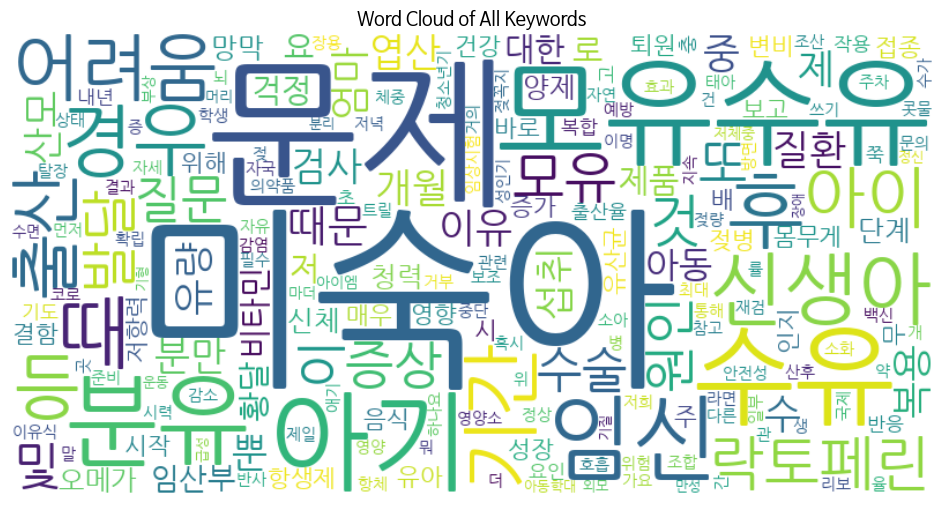

Keyword Correlation Analysis...
Keyword Trend Analysis...


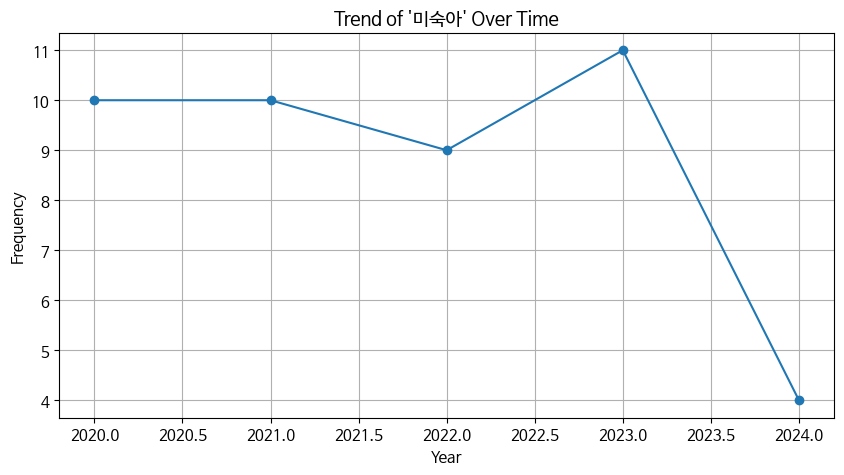

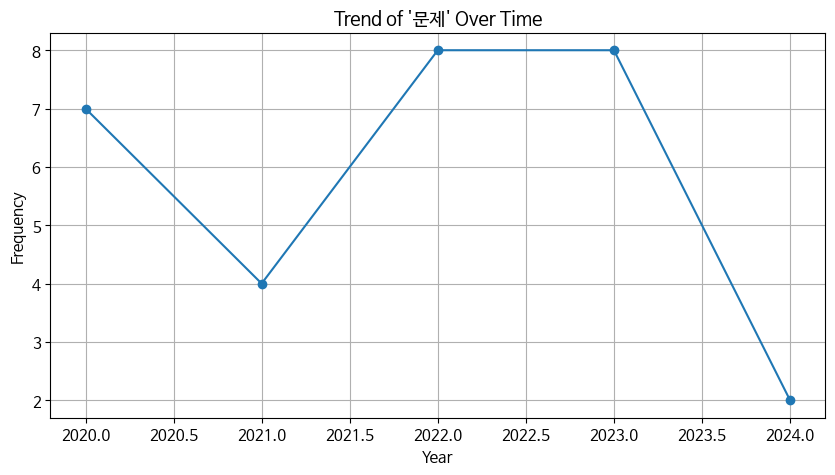

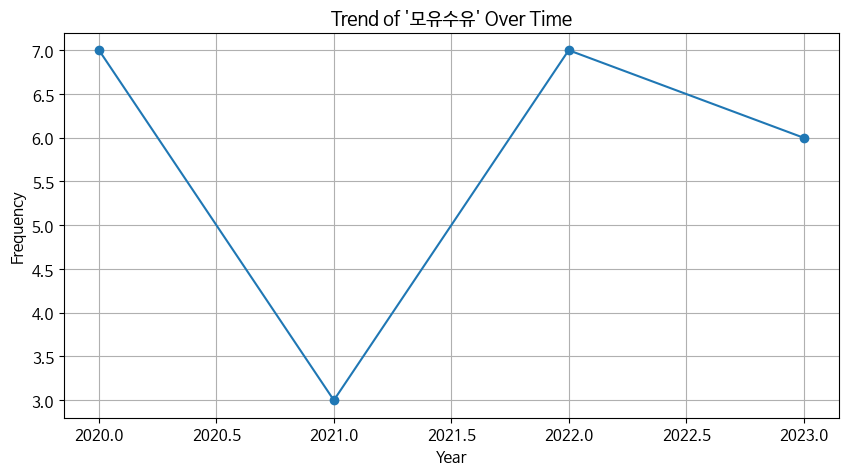

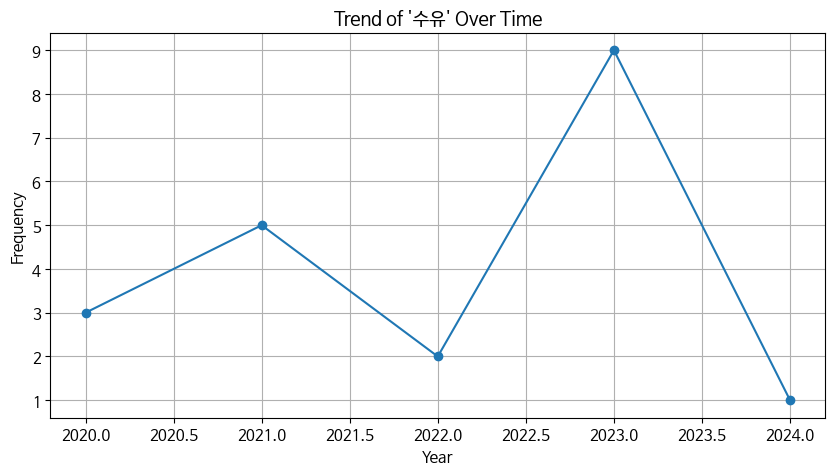

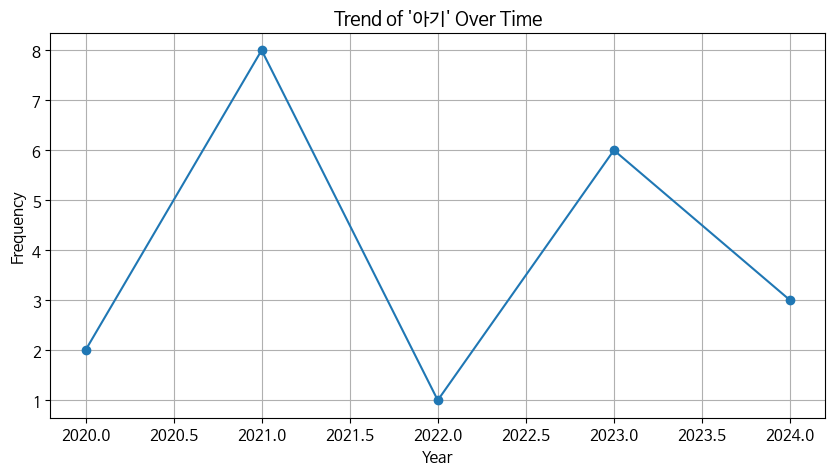

Analysis Complete.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
import os

# 파일 경로 설정
folder_path = "/content/drive/MyDrive/지식인_크롤링(2020-2024)/pre_지식in"  # CSV 파일들이 저장된 폴더 경로
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 형태소 분석기 준비
okt = Okt()

# 키워드 저장용
all_keywords = []
trend_data = []

# 각 파일 처리
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing: {file}")

    # 파일 불러오기
    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='euc-kr')

    # 날짜 변환
    data['pubDate'] = pd.to_datetime(data['pubDate'], errors='coerce')

    # 결측치 제거
    data = data.dropna(subset=['title', 'description', 'pubDate'])

    # HTML 태그 제거
    data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
    data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

    # 키워드 추출 및 저장
    for _, row in data.iterrows():
        tokens = okt.nouns(row['title']) + okt.nouns(row['description'])
        all_keywords.extend(tokens)

        # 연도별 키워드 추출
        trend_data.append({'year': row['pubDate'].year, 'keywords': tokens})

# 워드 클라우드 생성
print("Generating Word Cloud...")

# 폰트 경로 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 한글 폰트 파일 경로

word_counts = Counter(all_keywords)
wordcloud = WordCloud(font_path=font_path, background_color="white", width=800, height=400)
wordcloud.generate_from_frequencies(word_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Keywords')
plt.show()

# 키워드 간 상관관계 분석 (빈도 기반)
print("Keyword Correlation Analysis...")
from itertools import combinations
from collections import defaultdict

# 키워드 상관관계 저장
correlation = defaultdict(Counter)

for item in trend_data:
    keywords = item['keywords']
    for pair in combinations(keywords, 2):
        correlation[pair[0]][pair[1]] += 1

# 상관관계 데이터프레임 생성
correlation_df = pd.DataFrame.from_dict(correlation, orient='index').fillna(0)

# 시기별 키워드 트렌드 분석
print("Keyword Trend Analysis...")
trend_df = pd.DataFrame(trend_data)
trend_df = trend_df.explode('keywords')
trend_trends = trend_df.groupby(['year', 'keywords']).size().reset_index(name='frequency')

# 시기별 키워드 변화 시각화
for keyword in word_counts.most_common(5):
    keyword_name = keyword[0]
    keyword_trend = trend_trends[trend_trends['keywords'] == keyword_name]

    plt.figure(figsize=(10, 5))
    plt.plot(keyword_trend['year'], keyword_trend['frequency'], marker='o')
    plt.title(f"Trend of '{keyword_name}' Over Time")
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

print("Analysis Complete.")

# 불용어 처리 단계

- 워드 클라우드

Processing: 전처리된_미숙아 모유수유 문제_지식인.csv
Processing: 전처리된_미숙아 빨기 문제_지식인.csv
Processing: 전처리된_미숙아 삼킴 문제_지식인.csv
Processing: 전처리된_미숙아 수유 어려움_지식인.csv
Processing: 전처리된_미숙아 연하 곤란_지식인.csv
Generating Word Cloud...


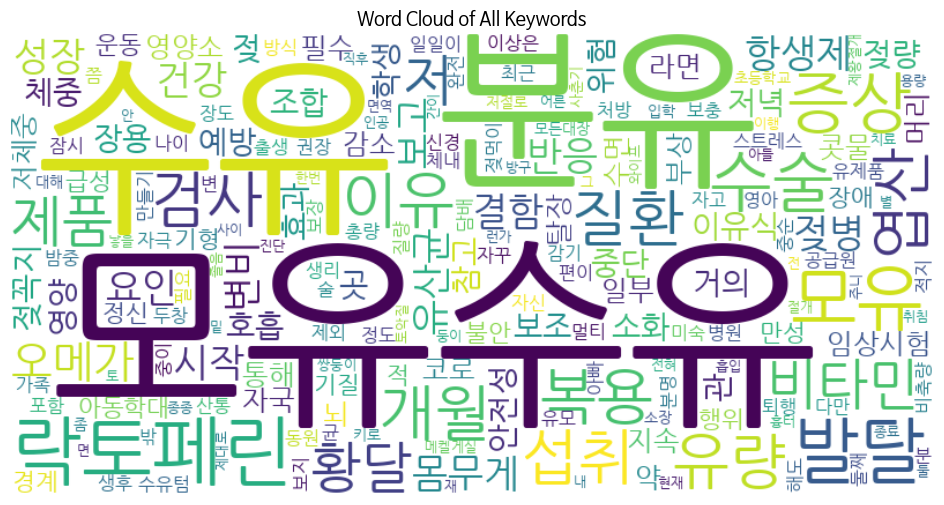

Keyword Correlation Analysis...
Analysis Complete.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
import os
from bs4 import BeautifulSoup

# 키워드 리스트 정의
essential_keywords = ["모유수유","삼킴","연하 곤란","장애", "문제", "빨기", "수유", "구강","빠는 힘","리보 트릴"]

stop_words = [
    '증','뿐','월','수가','더','률','때','때문','뭐','로','조','충','무','개','말','건','고','및','시','쭉','주',
    '중','율','요','겁','테','수','길','제','생','병','후','또','것','이','등','잔','음','초'
]

remove_words = [
    '임신','어려움','질문','성인기','산후','쓰기','마더','저희','바로','애기','국제','조산','결과','재검','가요','분리',
    '혹시','관련','엄마','자연','적대','기도','하나요','결여','유아','거부','제일','대한','청소년기','자신감','확립','신생아',
    '미숙아','아동','아기','문의','준비','방면','최대','하루','노출','위해','크게','임산부','아이엠','이틀','외모','특성','자세',
    '주차','기간','문제','출산','양제','분만','단계','아이','경우','소아','상태','먼저','청소년','의학','걱정','출산율','복합','리보',
    '인지','류량','반사','태아','트릴','영향','신경학','매우','저항력','배','내년','산모','원인','자유', '백신','의약품','이명','항체',
    '감염','정상','작용','간','위','항생체','청력','시력','음식','증가','신체','망막','퇴원','접종','네이버','다른','추천','약간'
    ]

# 파일 경로 설정
folder_path = '/content/drive/MyDrive/지식인_크롤링(2020-2024)/pre_지식in'  # CSV 파일들이 저장된 폴더 경로
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 형태소 분석기 준비
okt = Okt()

# 키워드 저장용
all_keywords = []
trend_data = []

# 각 파일 처리
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing: {file}")

    # 파일 불러오기
    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='euc-kr')

    # 날짜 변환
    data['pubDate'] = pd.to_datetime(data['pubDate'], errors='coerce')

    # 결측치 제거
    data = data.dropna(subset=['title', 'description', 'pubDate'])

    # HTML 태그 제거
    data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
    data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

    # 키워드 추출 및 저장
    for _, row in data.iterrows():
        tokens = okt.nouns(row['title']) + okt.nouns(row['description'])
        filtered_tokens = [word for word in tokens if word not in stop_words and word not in remove_words]
        all_keywords.extend(filtered_tokens)

        # 연도별 키워드 추출
        trend_data.append({'year': row['pubDate'].year, 'keywords': filtered_tokens})

# 워드 클라우드 생성
print("Generating Word Cloud...")

# 폰트 경로 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 한글 폰트 파일 경로

word_counts = Counter(all_keywords)
wordcloud = WordCloud(font_path=font_path, background_color="white", width=800, height=400)
wordcloud.generate_from_frequencies(word_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Keywords')
plt.show()

# 키워드 간 상관관계 분석 (빈도 기반)
print("Keyword Correlation Analysis...")
from itertools import combinations
from collections import defaultdict

# 키워드 상관관계 저장
correlation = defaultdict(Counter)

for item in trend_data:
    keywords = item['keywords']
    for pair in combinations(keywords, 2):
        correlation[pair[0]][pair[1]] += 1

# 상관관계 데이터프레임 생성
correlation_df = pd.DataFrame.from_dict(correlation, orient='index').fillna(0)

print("Analysis Complete.")


- 합성 수정(워드클라우드)

Processing: 전처리된_미숙아 모유수유 문제_지식인.csv
Processing: 전처리된_미숙아 빨기 문제_지식인.csv
Processing: 전처리된_미숙아 삼킴 문제_지식인.csv
Processing: 전처리된_미숙아 수유 어려움_지식인.csv
Processing: 전처리된_미숙아 연하 곤란_지식인.csv
Generating Word Cloud...


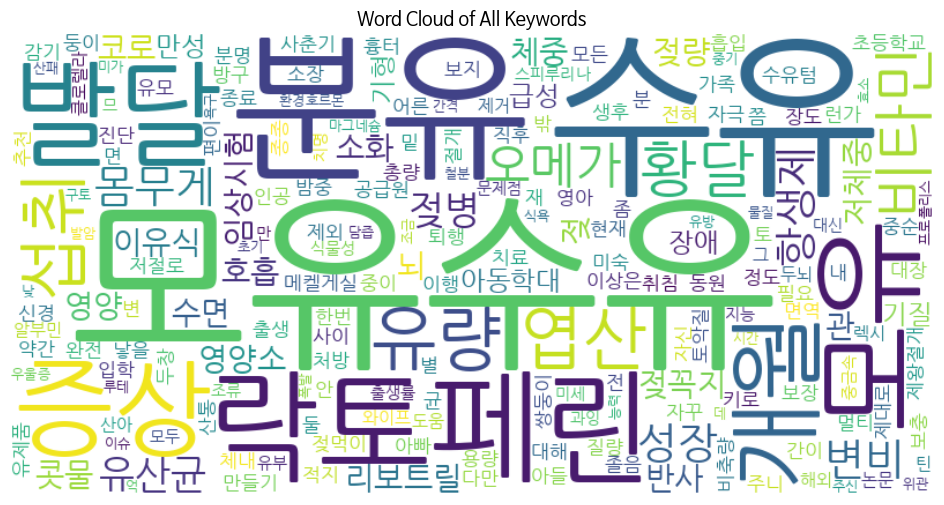

Keyword Correlation Analysis...
Analysis Complete.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
import os
from bs4 import BeautifulSoup
from itertools import combinations
from collections import defaultdict

# 키워드 리스트 정의
essential_keywords = ["모유수유", "삼킴", "연하 곤란", "장애", "문제", "빨기", "수유", "구강", "빠는 힘"]

stop_words = [
    '증', '뿐', '월', '수가', '더', '률', '때', '때문', '뭐', '로', '조', '충', '무', '개', '말', '건', '고', '및', '시', '쭉', '주',
    '중', '율', '요', '겁', '테', '수', '길', '제', '생', '병', '후', '또', '것', '이', '등', '잔', '음', '초', '저', '곳', '거의','로',
    '누가','나'
]

remove_words = [
    '임신', '어려움', '질문', '성인기', '산후', '쓰기', '마더', '저희', '바로', '애기', '국제', '조산', '결과', '재검', '가요', '분리',
    '혹시', '관련', '엄마', '자연', '적대', '기도', '하나요', '결여', '유아', '거부', '제일', '대한', '청소년기', '자신감', '확립', '신생아',
    '미숙아', '아동', '아기', '문의', '준비', '방면', '최대', '하루', '노출', '위해', '크게', '임산부', '아이엠', '이틀', '외모', '특성', '자세',
    '주차', '기간', '문제', '출산', '양제', '분만', '단계', '아이', '경우', '소아', '상태', '먼저', '청소년', '의학', '걱정', '출산율', '복합',
    '인지', '류량', '태아', '트릴', '영향', '신경학', '매우', '저항력', '배', '내년', '산모', '원인', '자유', '시작', '보고', '요인', '중단',
    '학생', '저녁', '다른', '보조', '조합', '참고', '장용', '위험', '안전성', '이유', '질환', '복용', '검사', '라면', '필수', '예방', '백신', '어려움',
    '이명', '항체', '감염', '정상', '작용', '간', '위', '항생체', '청력', '시력', '음식', '증가', '신체', '망막', '건강', '퇴원', '접종', '해도', '의약품',
    '지속', '일부', '네이버', '둘째', '머리', '지식', '부상', '자국', '상담', '김경남', '감소', '통해', '약', '정신', '운동', '불안', '경계',
    '일일이', '병원', '방식', '권장', '적', '행위', '스트레스', '나이', '자고', '술', '담배', '잠시', '생리', '최근', '포함', '하이닥','효과','수술',
    '청진','반응','제품','결함','탈장','내공','생각','특징','자존감','지경','적임','거절','기타'
]

# 파일 경로 설정
folder_path = '/content/drive/MyDrive/지식인_크롤링(2020-2024)/pre_지식in'  # CSV 파일들이 저장된 폴더 경로
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 형태소 분석기 준비
okt = Okt()

# 키워드 저장용
all_keywords = []
trend_data = []

# 각 파일 처리
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing: {file}")

    # 파일 불러오기
    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='euc-kr')

    # 날짜 변환
    data['pubDate'] = pd.to_datetime(data['pubDate'], errors='coerce')

    # 결측치 제거
    data = data.dropna(subset=['title', 'description', 'pubDate'])

    # HTML 태그 제거
    data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
    data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

    # 키워드 추출 및 저장
    for _, row in data.iterrows():
        tokens = okt.nouns(row['title']) + okt.nouns(row['description'])

        # "빨기"와 "반사", "리보"와 "트릴"을 결합
        combined_tokens = []
        skip = False
        for i in range(len(tokens) - 1):
            if skip:
                skip = False
                continue
            if tokens[i] == "빨기" and tokens[i + 1] == "반사":
                combined_tokens.append("빨기반사")
                skip = True
            elif tokens[i] == "리보" and tokens[i + 1] == "트릴":
                combined_tokens.append("리보트릴")
                skip = True
            else:
                combined_tokens.append(tokens[i])
        if not skip:
            combined_tokens.append(tokens[-1])

        # 불용어 제거
        filtered_tokens = [word for word in combined_tokens if word not in stop_words and word not in remove_words]
        all_keywords.extend(filtered_tokens)

        # 연도별 키워드 추출
        trend_data.append({'year': row['pubDate'].year, 'keywords': filtered_tokens})

# 워드 클라우드 생성
print("Generating Word Cloud...")

# 폰트 경로 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 한글 폰트 경로

word_counts = Counter(all_keywords)
wordcloud = WordCloud(font_path=font_path, background_color="white", width=800, height=400)
wordcloud.generate_from_frequencies(word_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Keywords')
plt.show()

# 키워드 간 상관관계 분석 (빈도 기반)
print("Keyword Correlation Analysis...")

# 키워드 상관관계 저장
correlation = defaultdict(Counter)

for item in trend_data:
    keywords = item['keywords']
    for pair in combinations(keywords, 2):
        correlation[pair[0]][pair[1]] += 1

# 상관관계 데이터프레임 생성
correlation_df = pd.DataFrame.from_dict(correlation, orient='index').fillna(0)

print("Analysis Complete.")

- 연도별 키워드 분석

Processing: 전처리된_미숙아 모유수유 문제_지식인.csv
Processing: 전처리된_미숙아 빨기 문제_지식인.csv
Processing: 전처리된_미숙아 삼킴 문제_지식인.csv
Processing: 전처리된_미숙아 수유 어려움_지식인.csv
Processing: 전처리된_미숙아 연하 곤란_지식인.csv
Analyzing yearly keyword trends...


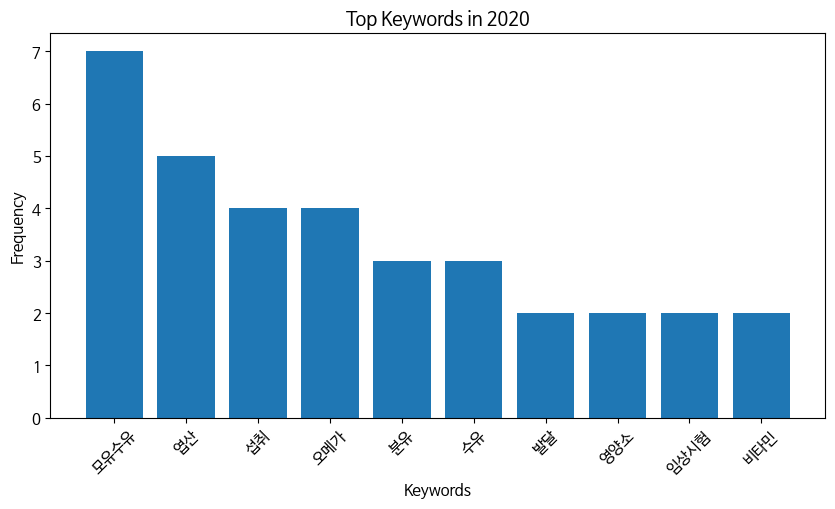

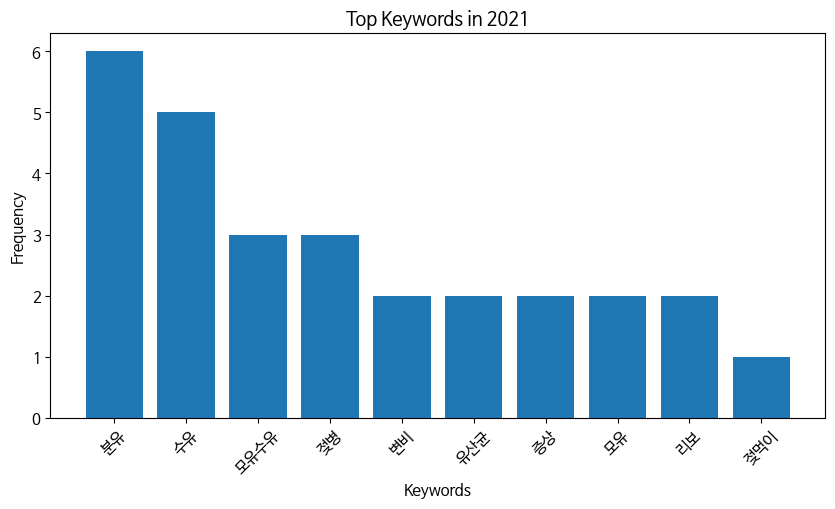

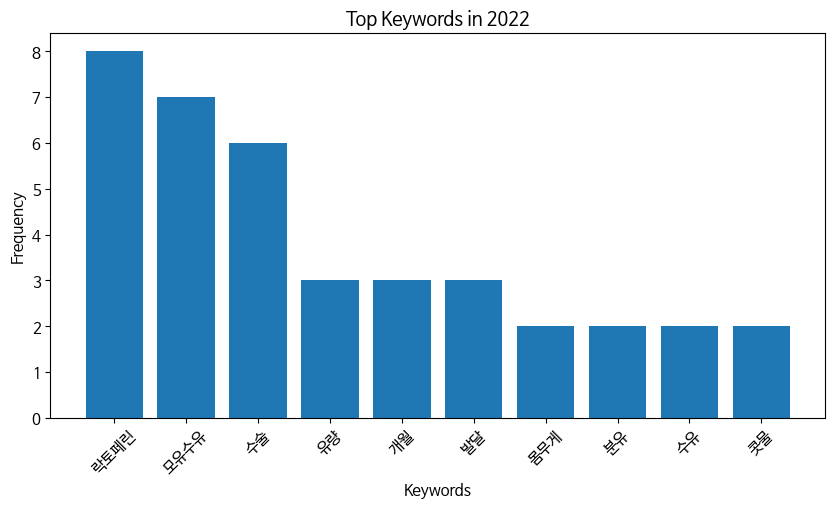

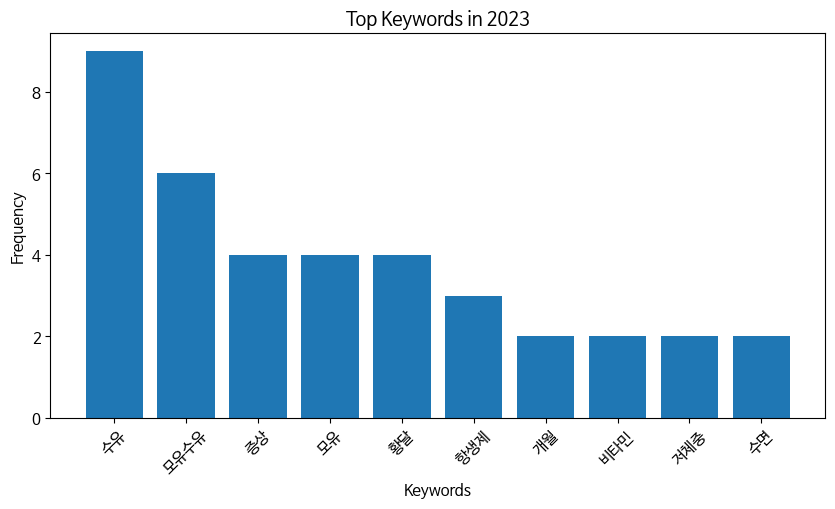

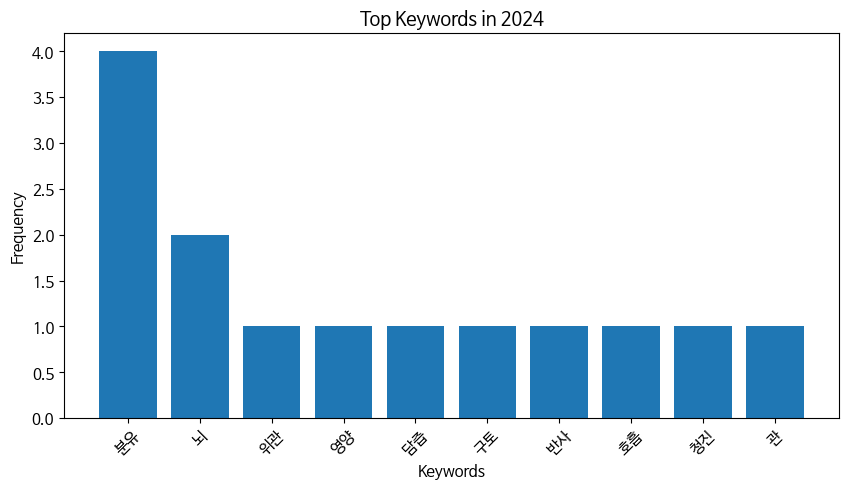

Yearly trend analysis complete.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
import os
from bs4 import BeautifulSoup

# 키워드 리스트 정의
essential_keywords = ["모유수유","삼킴","연하 곤란","장애", "문제", "빨기", "수유", "구강","빠는 힘"]

stop_words = [
    '증','뿐','월','수가','더','률','때','때문','뭐','로','조','충','무','개','말','건','고','및','시','쭉','주',
    '중','율','요','겁','테','수','길','제','생','병','후','또','것','이','등','잔','음','초','저','곳','거의'
]

remove_words = [
    '임신','어려움','질문','성인기','산후','쓰기','마더','저희','바로','애기','국제','조산','결과','재검','가요','분리',
    '혹시','관련','엄마','자연','적대','기도','하나요','결여','유아','거부','제일','대한','청소년기','자신감','확립','신생아',
    '미숙아','아동','아기','문의','준비','방면','최대','하루','노출','위해','크게','임산부','아이엠','이틀','외모','특성','자세',
    '주차','기간','문제','출산','양제','분만','단계','아이','경우','소아','상태','먼저','청소년','의학','걱정','출산율','복합',
    '인지','류량','태아','트릴','영향','신경학','매우','저항력','배','내년','산모','원인','자유','시작','보고','요인','중단',
    '학생','저녁','다른','보조','조합','참고','장용','위험','안전성','이유','질환','복용','검사','라면','필수','예방','백신','어려움',
    '이명','항체','감염','정상','작용','간','위','항생체','청력','시력','음식','증가','신체','망막','건강','퇴원','접종','해도','의약품',
    '지속','일부','네이버','둘째','머리','지식','부상','자국','상담','김경남','감소','통해','약','정신','운동','불안','경계',
    '일일이','병원','방식','권장','적','행위','스트레스','나이','자고','술','담배','잠시','생리','최근','포함','하이닥'
    ]

# 파일 경로 설정
folder_path = "/content/drive/MyDrive/지식인_크롤링(2020-2024)/pre_지식in"  # CSV 파일들이 저장된 폴더 경로
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 형태소 분석기 준비
okt = Okt()

# 연도별 키워드 저장용
yearly_keywords = {}

# 각 파일 처리
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing: {file}")

    # 파일 불러오기
    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='euc-kr')

    # 날짜 변환
    data['pubDate'] = pd.to_datetime(data['pubDate'], errors='coerce')

    # 결측치 제거
    data = data.dropna(subset=['title', 'description', 'pubDate'])

    # HTML 태그 제거
    data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
    data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

    # 연도별 키워드 추출 및 저장
    for _, row in data.iterrows():
        year = row['pubDate'].year
        tokens = okt.nouns(row['title']) + okt.nouns(row['description'])
        filtered_tokens = [word for word in tokens if word not in stop_words and word not in remove_words]

        if year not in yearly_keywords:
            yearly_keywords[year] = []
        yearly_keywords[year].extend(filtered_tokens)

# 연도별 키워드 빈도 분석
print("Analyzing yearly keyword trends...")
yearly_keyword_counts = {}

for year, keywords in yearly_keywords.items():
    yearly_keyword_counts[year] = Counter(keywords).most_common(10)  # 상위 10개 키워드

# 연도별 트렌드 시각화
for year, keyword_counts in sorted(yearly_keyword_counts.items()):
    keywords, counts = zip(*keyword_counts)

    plt.figure(figsize=(10, 5))
    plt.bar(keywords, counts)
    plt.title(f"Top Keywords in {year}")
    plt.xlabel("Keywords")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

print("Yearly trend analysis complete.")

- 합성 수정(연도별)

Processing: 전처리된_미숙아 모유수유 문제_지식인.csv
Processing: 전처리된_미숙아 빨기 문제_지식인.csv
Processing: 전처리된_미숙아 삼킴 문제_지식인.csv
Processing: 전처리된_미숙아 수유 어려움_지식인.csv
Processing: 전처리된_미숙아 연하 곤란_지식인.csv
Analyzing yearly keyword trends...


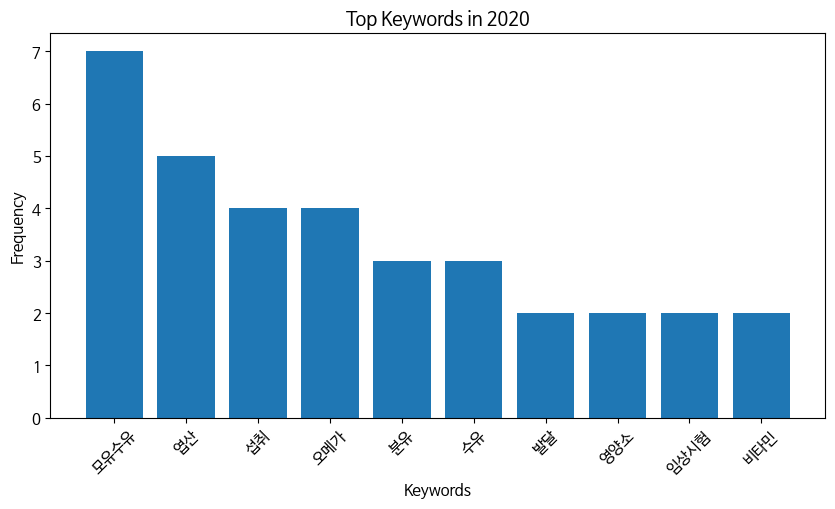

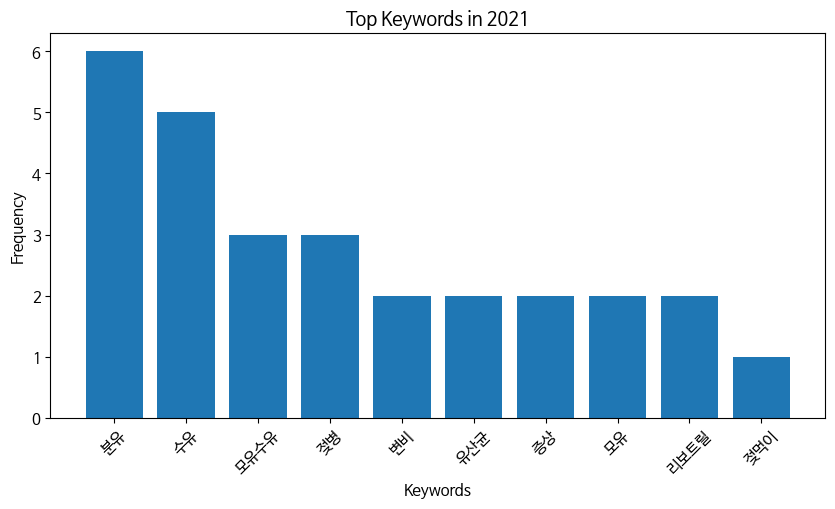

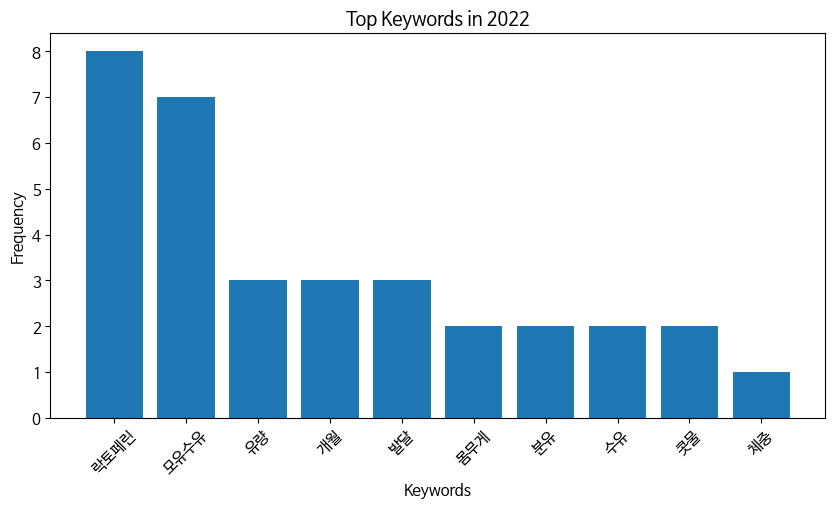

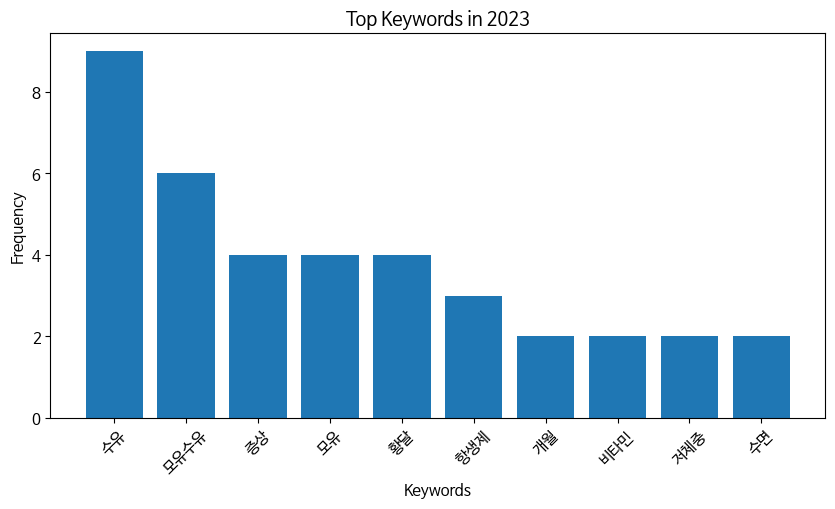

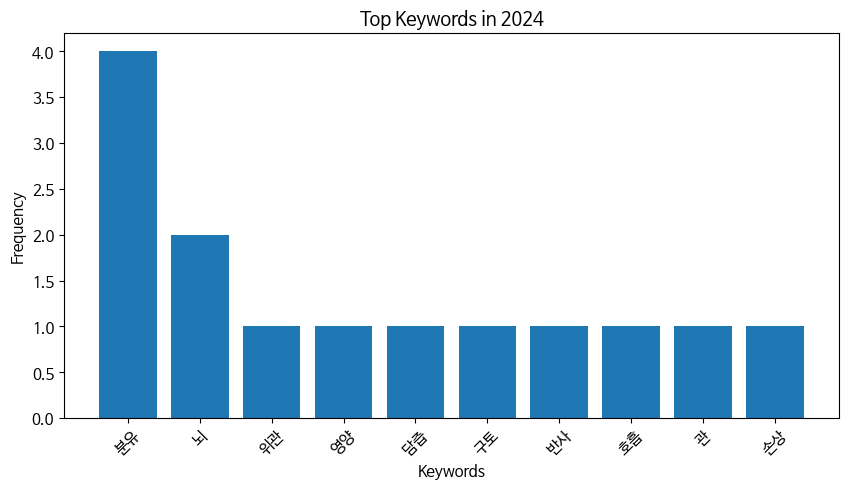

Yearly trend analysis complete.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
import os
from bs4 import BeautifulSoup

# 키워드 리스트 정의
essential_keywords = ["모유수유", "삼킴", "연하 곤란", "장애", "문제", "빨기", "수유", "구강", "빠는 힘"]

stop_words = [
    '증', '뿐', '월', '수가', '더', '률', '때', '때문', '뭐', '로', '조', '충', '무', '개', '말', '건', '고', '및', '시', '쭉', '주',
    '중', '율', '요', '겁', '테', '수', '길', '제', '생', '병', '후', '또', '것', '이', '등', '잔', '음', '초', '저', '곳', '거의','로',
    '누가','나'
]

remove_words = [
    '임신', '어려움', '질문', '성인기', '산후', '쓰기', '마더', '저희', '바로', '애기', '국제', '조산', '결과', '재검', '가요', '분리',
    '혹시', '관련', '엄마', '자연', '적대', '기도', '하나요', '결여', '유아', '거부', '제일', '대한', '청소년기', '자신감', '확립', '신생아',
    '미숙아', '아동', '아기', '문의', '준비', '방면', '최대', '하루', '노출', '위해', '크게', '임산부', '아이엠', '이틀', '외모', '특성', '자세',
    '주차', '기간', '문제', '출산', '양제', '분만', '단계', '아이', '경우', '소아', '상태', '먼저', '청소년', '의학', '걱정', '출산율', '복합',
    '인지', '류량', '태아', '트릴', '영향', '신경학', '매우', '저항력', '배', '내년', '산모', '원인', '자유', '시작', '보고', '요인', '중단',
    '학생', '저녁', '다른', '보조', '조합', '참고', '장용', '위험', '안전성', '이유', '질환', '복용', '검사', '라면', '필수', '예방', '백신', '어려움',
    '이명', '항체', '감염', '정상', '작용', '간', '위', '항생체', '청력', '시력', '음식', '증가', '신체', '망막', '건강', '퇴원', '접종', '해도', '의약품',
    '지속', '일부', '네이버', '둘째', '머리', '지식', '부상', '자국', '상담', '김경남', '감소', '통해', '약', '정신', '운동', '불안', '경계',
    '일일이', '병원', '방식', '권장', '적', '행위', '스트레스', '나이', '자고', '술', '담배', '잠시', '생리', '최근', '포함', '하이닥','효과','수술',
    '청진','반응','제품','결함','탈장','내공','생각','특징','자존감','지경','적임','거절','기타','코로'
]

# 파일 경로 설정
folder_path = "/content/drive/MyDrive/지식인_크롤링(2020-2024)/pre_지식in"  # CSV 파일들이 저장된 폴더 경로
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 형태소 분석기 준비
okt = Okt()

# 연도별 키워드 저장용
yearly_keywords = {}

# 각 파일 처리
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing: {file}")

    # 파일 불러오기
    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='euc-kr')

    # 날짜 변환
    data['pubDate'] = pd.to_datetime(data['pubDate'], errors='coerce')

    # 결측치 제거
    data = data.dropna(subset=['title', 'description', 'pubDate'])

    # HTML 태그 제거
    data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
    data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

    # 연도별 키워드 추출 및 저장
    for _, row in data.iterrows():
        year = row['pubDate'].year
        tokens = okt.nouns(row['title']) + okt.nouns(row['description'])

        # "빨기"와 "반사", "리보"와 "트릴"을 결합
        combined_tokens = []
        skip = False
        for i in range(len(tokens) - 1):
            if skip:
                skip = False
                continue
            if tokens[i] == "빨기" and tokens[i + 1] == "반사":
                combined_tokens.append("빨기 반사")
                skip = True
            elif tokens[i] == "리보" and tokens[i + 1] == "트릴":
                combined_tokens.append("리보트릴")
                skip = True
            else:
                combined_tokens.append(tokens[i])
        if not skip:
            combined_tokens.append(tokens[-1])

        # 불용어 제거
        filtered_tokens = [word for word in combined_tokens if word not in stop_words and word not in remove_words]

        if year not in yearly_keywords:
            yearly_keywords[year] = []
        yearly_keywords[year].extend(filtered_tokens)

# 연도별 키워드 빈도 분석
print("Analyzing yearly keyword trends...")
yearly_keyword_counts = {}

for year, keywords in yearly_keywords.items():
    yearly_keyword_counts[year] = Counter(keywords).most_common(10)  # 상위 10개 키워드

# 연도별 트렌드 시각화
for year, keyword_counts in sorted(yearly_keyword_counts.items()):
    keywords, counts = zip(*keyword_counts)

    plt.figure(figsize=(10, 5))
    plt.bar(keywords, counts)
    plt.title(f"Top Keywords in {year}")
    plt.xlabel("Keywords")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

print("Yearly trend analysis complete.")

- 검색어 총 파일 키워드 rank 50

Processing: 전처리된_미숙아 모유수유 문제_지식인.csv
Processing: 전처리된_미숙아 빨기 문제_지식인.csv
Processing: 전처리된_미숙아 삼킴 문제_지식인.csv
Processing: 전처리된_미숙아 수유 어려움_지식인.csv
Processing: 전처리된_미숙아 연하 곤란_지식인.csv


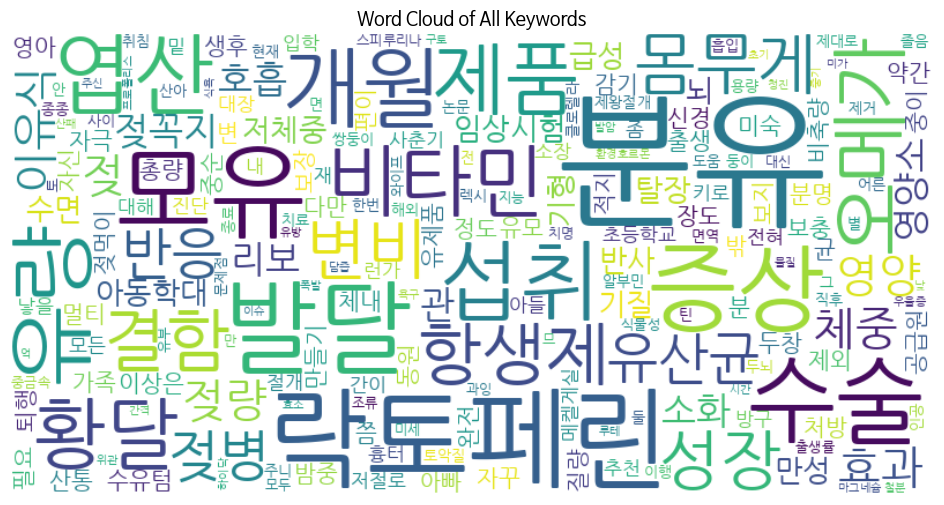

   Keyword  Frequency
0       분유         16
1     락토페린          8
2       모유          7
3       발달          7
4       증상          6
5       수술          6
6       개월          5
7       유량          5
8       섭취          5
9       엽산          5
10      황달          4
11     비타민          4
12      제품          4
13     오메가          4
14      결함          3
15     항생제          3
16     몸무게          3
17      성장          3
18      변비          3
19     유산균          3
20      젖병          3
21      반응          3
22       젖          2
23      영양          2
24      효과          2
25      체중          2
26     이유식          2
27      젖량          2
28     젖꼭지          2
29      리보          2
30      호흡          2
31      소화          2
32       관          2
33     영양소          2
34    임상시험          2
35      반사          2
36       뇌          2
37      탈장          2
38     저체중          2
39      수면          2
40    아동학대          2
41      기형          2
42      만성          2
43      급성          2
44      기질

In [ ]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Okt
import os
from bs4 import BeautifulSoup

# 키워드 리스트 정의
essential_keywords = ["모유수유","삼킴","연하 곤란","장애", "문제", "빨기", "수유", "구강","빠는 힘"]

stop_words = [
    '증','뿐','월','수가','더','률','때','때문','뭐','로','조','충','무','개','말','건','고','및','시','쭉','주',
    '중','율','요','겁','테','수','길','제','생','병','후','또','것','이','등','잔','음','초','저','곳','거의'
]

remove_words = [
    '임신','어려움','질문','성인기','산후','쓰기','마더','저희','바로','애기','국제','조산','결과','재검','가요','분리',
    '혹시','관련','엄마','자연','적대','기도','하나요','결여','유아','거부','제일','대한','청소년기','자신감','확립','신생아',
    '미숙아','아동','아기','문의','준비','방면','최대','하루','노출','위해','크게','임산부','아이엠','이틀','외모','특성','자세',
    '주차','기간','문제','출산','양제','분만','단계','아이','경우','소아','상태','먼저','청소년','의학','걱정','출산율','복합',
    '인지','류량','태아','트릴','영향','신경학','매우','저항력','배','내년','산모','원인','자유','시작','보고','요인','중단',
    '학생','저녁','다른','보조','조합','참고','장용','위험','안전성','이유','질환','복용','검사','라면','필수','예방','백신','어려움',
    '이명','항체','감염','정상','작용','간','위','항생체','청력','시력','음식','증가','신체','망막','건강','퇴원','접종','해도','의약품',
    '지속','일부','네이버','둘째','머리','콧물','지식','부상','자국','상담','김경남','감소','통해','약','정신','운동','불안','경계',
    '일일이','병원','방식','권장','적','행위','스트레스','나이','자고','술','담배','잠시','생리','최근','포함','코로'
    ]

# 폴더 경로 설정
folder_path = '/content/drive/MyDrive/지식인_크롤링(2020-2024)/pre_지식in'  # 실제 경로에 맞게 수정

# 폴더 내 파일 목록 가져오기
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 형태소 분석기 준비
okt = Okt()

# 키워드 저장용
all_keywords = []

# 각 파일 처리
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing: {file}")

    # 파일 불러오기
    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='euc-kr')

    # 결측치 제거
    data = data.dropna(subset=['title', 'description'])

    # HTML 태그 제거
    data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
    data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

    # 키워드 추출
    for _, row in data.iterrows():
        tokens = okt.nouns(row['title']) + okt.nouns(row['description'])
        filtered_tokens = [
            word for word in tokens
            if word not in stop_words and word not in remove_words and word not in essential_keywords
        ]
        all_keywords.extend(filtered_tokens)

# 상위 50개 키워드 추출
word_counts = Counter(all_keywords)
top_50_keywords = word_counts.most_common(50)

# 데이터프레임 생성
top_50_keywords_df = pd.DataFrame(top_50_keywords, columns=['Keyword', 'Frequency'])

# 워드 클라우드 생성
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 한글 폰트 경로
wordcloud = WordCloud(font_path=font_path, background_color="white", width=800, height=400)
wordcloud.generate_from_frequencies(word_counts)

# 워드 클라우드 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Keywords')
plt.show()

# 상위 50개 키워드 출력
print(top_50_keywords_df)

# CSV 파일로 저장
top_50_keywords_df.to_csv("top_50_keywords(naver지식in).csv", index=False, encoding='utf-8-sig')
print("상위 50개 키워드 데이터가 'top_50_keywords.csv(naver지식in)'로 저장되었습니다.")


- 합성 수정(top50)

Processing: 전처리된_미숙아 모유수유 문제_지식인.csv
Processing: 전처리된_미숙아 빨기 문제_지식인.csv
Processing: 전처리된_미숙아 삼킴 문제_지식인.csv
Processing: 전처리된_미숙아 수유 어려움_지식인.csv
Processing: 전처리된_미숙아 연하 곤란_지식인.csv


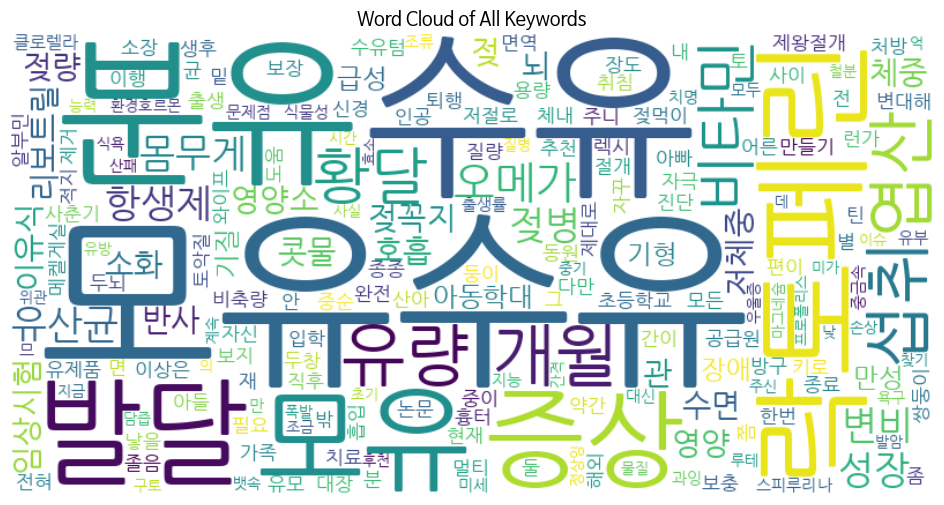

    Keyword  Frequency
0      모유수유         23
1        수유         20
2        분유         16
3      락토페린          8
4        모유          7
..      ...        ...
195      손상          1
196      후천          1
197      질병          1
198       의          1
199      계속          1

[200 rows x 2 columns]
상위 50개 키워드 데이터가 'top_50_keywords(naver지식in).csv'로 저장되었습니다.


In [ ]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Okt
import os
from bs4 import BeautifulSoup

# 키워드 리스트 정의
essential_keywords = ["모유수유", "삼킴", "연하 곤란", "장애", "문제", "빨기", "수유", "구강", "빠는 힘"]

stop_words = [
    '증', '뿐', '월', '수가', '더', '률', '때', '때문', '뭐', '로', '조', '충', '무', '개', '말', '건', '고', '및', '시', '쭉', '주',
    '중', '율', '요', '겁', '테', '수', '길', '제', '생', '병', '후', '또', '것', '이', '등', '잔', '음', '초', '저', '곳', '거의','로',
    '누가','나'
]

remove_words = [
    '임신', '어려움', '질문', '성인기', '산후', '쓰기', '마더', '저희', '바로', '애기', '국제', '조산', '결과', '재검', '가요', '분리',
    '혹시', '관련', '엄마', '자연', '적대', '기도', '하나요', '결여', '유아', '거부', '제일', '대한', '청소년기', '자신감', '확립', '신생아',
    '미숙아', '아동', '아기', '문의', '준비', '방면', '최대', '하루', '노출', '위해', '크게', '임산부', '아이엠', '이틀', '외모', '특성', '자세',
    '주차', '기간', '문제', '출산', '양제', '분만', '단계', '아이', '경우', '소아', '상태', '먼저', '청소년', '의학', '걱정', '출산율', '복합',
    '인지', '류량', '태아', '트릴', '영향', '신경학', '매우', '저항력', '배', '내년', '산모', '원인', '자유', '시작', '보고', '요인', '중단',
    '학생', '저녁', '다른', '보조', '조합', '참고', '장용', '위험', '안전성', '이유', '질환', '복용', '검사', '라면', '필수', '예방', '백신', '어려움',
    '이명', '항체', '감염', '정상', '작용', '간', '위', '항생체', '청력', '시력', '음식', '증가', '신체', '망막', '건강', '퇴원', '접종', '해도', '의약품',
    '지속', '일부', '네이버', '둘째', '머리', '지식', '부상', '자국', '상담', '김경남', '감소', '통해', '약', '정신', '운동', '불안', '경계',
    '일일이', '병원', '방식', '권장', '적', '행위', '스트레스', '나이', '자고', '술', '담배', '잠시', '생리', '최근', '포함', '하이닥','효과','수술',
    '청진','반응','제품','결함','탈장','내공','생각','특징','자존감','지경','적임','거절','기타','제외','총량','분명','밤중','코로','감기',
    '미숙','정도','영아','산통'
]

# 폴더 경로 설정
folder_path = '/content/drive/MyDrive/지식인_크롤링(2020-2024)/pre_지식in'  # 실제 경로에 맞게 수정

# 폴더 내 파일 목록 가져오기
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 형태소 분석기 준비
okt = Okt()

# 키워드 저장용
all_keywords = []

# 각 파일 처리
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing: {file}")

    # 파일 불러오기
    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='euc-kr')

    # 결측치 제거
    data = data.dropna(subset=['title', 'description'])

    # HTML 태그 제거
    data['title'] = data['title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
    data['description'] = data['description'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

    # 키워드 추출 및 결합 처리
    for _, row in data.iterrows():
        tokens = okt.nouns(row['title']) + okt.nouns(row['description'])

        # "빨기"와 "반사", "리보"와 "트릴"을 결합
        combined_tokens = []
        skip = False
        for i in range(len(tokens) - 1):
            if skip:
                skip = False
                continue
            if tokens[i] == "빨기" and tokens[i + 1] == "반사":
                combined_tokens.append("빨기반사")
                skip = True
            elif tokens[i] == "리보" and tokens[i + 1] == "트릴":
                combined_tokens.append("리보트릴")
                skip = True
            else:
                combined_tokens.append(tokens[i])
        if not skip:
            combined_tokens.append(tokens[-1])

        # 불용어 제거
        filtered_tokens = [word for word in combined_tokens if word not in stop_words and word not in remove_words]
        all_keywords.extend(filtered_tokens)

# 상위 50개 키워드 추출
word_counts = Counter(all_keywords)
top_50_keywords = word_counts.most_common(200)

# 데이터프레임 생성
top_50_keywords_df = pd.DataFrame(top_50_keywords, columns=['Keyword', 'Frequency'])

# 워드 클라우드 생성
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 한글 폰트 경로
wordcloud = WordCloud(font_path=font_path, background_color="white", width=800, height=400)
wordcloud.generate_from_frequencies(word_counts)

# 워드 클라우드 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Keywords')
plt.show()

# 상위 50개 키워드 출력
print(top_50_keywords_df)

# CSV 파일로 저장
top_50_keywords_df.to_csv("top_50_keywords(naver지식in).csv", index=False, encoding='utf-8-sig')
print("상위 50개 키워드 데이터가 'top_50_keywords(naver지식in).csv'로 저장되었습니다.")
